In [1]:
import pandas as pd
from importlib import reload
import sys
sys.path.append("../../../../data/code")
import quantification
pd.set_option('display.max_rows', 500)

alternation_set = ["man", "werden"]
alternating = "alternating_nonagentivity_nonprimed"

## Annotation

In [2]:
import annotate_nonagentivity

## Overview

In [3]:
import pandas as pd
df = pd.read_csv("../../VACW.csv", index_col=0)
df.groupby("speaker").alternating_nonagentivity_nonprimed.value_counts()

speaker  alternating_nonagentivity_nonprimed
A        no                                     76704
         yes                                      314
S        no                                     25445
         yes                                       55
Name: alternating_nonagentivity_nonprimed, dtype: int64

# Creating DataFrame for modeling

In [12]:
#reading DataFrame with column "alternating" indicating where there was an opportunity ("yes") to choose a variant from the alternation set or not ("no")
df = pd.read_csv("../../VACW.csv", na_filter=False, sep=",", index_col=0)

In [13]:
#adding information on lexical quasi-persistence to df
df_w_quasi_p = pd.read_csv("../../../VACW/3_Persistence_tagged/2_human_to_VA/Persistence_VACW_all.csv")
#summarising all kinds of lexical quasi-persistence, i.e., writing True in new column, if lexical SPP was produced by VA (due to persistence tagging direction in this df, only the VA produced SPPs, thus no need to check speaker)
df_w_quasi_p["lexical_quasi_persistence_summarised"] = df_w_quasi_p[["persistence_unigrams_lemma", "persistence_bigrams_lemma", "persistence_trigrams_lemma", "persistence_quadrigrams_lemma"]].applymap(lambda x: str(x).startswith("SPP")).any(axis=1)
df["quasi-persistence"] = df_w_quasi_p["lexical_quasi_persistence_summarised"]
df

,id,word,lemma,pos_finegrained,pos_coarse,speaker,interaction_id,directionality,turn_id,merged,participant_id,setting,start,end,alternating_passive,alternating_nonagentivity,alternating_nonagentivity_nonprimed,quasi-persistence
0,1,computer,computer,FM,NN,S,1,SA,1,,,,2021-03-08 08:22:57.874000+00:00,,,,no,False
1,2,kannst,können,VVFIN.2.Sg.Pres.Ind,VMFIN,S,1,SA,1,,,,2021-03-08 08:22:57.874000+00:00,,,,no,False
2,3,du,du,PPER.2.Nom.Sg.*,PPER,S,1,SA,1,,,,2021-03-08 08:22:57.874000+00:00,,,,no,False
3,4,ein,ein,ART.*.*.*,ART,S,1,SA,1,,,,2021-03-08 08:22:57.874000+00:00,,,,no,False
4,5,quiz,quiz,ADJD.Pos,NN,S,1,SA,1,,,,2021-03-08 08:22:57.874000+00:00,,,,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102513,102514,für,für,APPR,APPR,A,1053,AS,78,,,,2021-11-01 09:03:28.863000+00:00,,,,no,False
102514,102515,dieses,dieser,PDAT.Acc.Sg.Neut,PDAT,A,1053,AS,78,,,,2021-11-01 09:03:28.863000+00:00,,,,no,False
102515,102516,Gerät,gerät,NN.Acc.Sg.Neut,NN,A,1053,AS,78,,,,2021-11-01 09:03:28.863000+00:00,,,,no,False
102516,102517,ist,sein,VAFIN.3.Sg.Pres.Ind,VAFIN,A,1053,AS,78,,,,2021-11-01 09:03:28.863000+00:00,,,,no,False


In [14]:
reload(quantification)
variation_sample = quantification.prepare_data_for_modeling(df, alternating, beta_variants=["man", "werden"])
variation_sample.to_csv("nonagentivity_for_analysis.csv")
variation_sample

,CURRENT,PREVIOUS,PREVIOUS_SPEAKER,PREVIOUS_DISTANCE,PREVIOUS_DISTANCE_LOG,PREVIOUS_BETA_MAN,PREVIOUS_BETA_WERDEN,QUASI_PERSISTENCE,HUMAN_ID,INTERACTION_ID,TURN_LENGTH,CONFEDERATE
9127,werden,werden,A,119,4.779123,False,False,True,,86,9,False
9137,werden,werden,S,10,2.302585,False,False,True,,86,10,False
33305,werden,werden,S,17,2.833213,False,False,False,,369,6,False
33322,werden,werden,S,17,2.833213,False,False,False,,369,6,False
33340,werden,werden,S,18,2.890372,False,False,False,,369,8,False
33359,werden,werden,S,19,2.944439,False,False,False,,369,8,False
33378,werden,werden,S,19,2.944439,False,False,False,,369,8,False
40175,werden,werden,S,19,2.944439,False,False,False,,443,8,False
40196,werden,werden,S,21,3.044522,False,False,False,,443,8,False
40595,man,werden,A,81,4.394449,False,False,True,,447,7,False


In [15]:
len(variation_sample) #25 of the 55 cases are unfortunately the first variant of the intereaction, thus dropped

30

In [9]:
variation_sample.CURRENT.value_counts(normalize=True)

werden    0.666667
man       0.333333
Name: CURRENT, dtype: float64

# Calculating switch rates as a function of variant proportions

In [10]:
df = pd.read_csv("../../VACW.csv", na_filter=False, sep=",", index_col=0)
df

,id,word,lemma,pos_finegrained,pos_coarse,speaker,interaction_id,directionality,turn_id,merged,participant_id,setting,start,end,alternating_passive,alternating_nonagentivity,alternating_nonagentivity_nonprimed
0,1,computer,computer,FM,NN,S,1,SA,1,,,,2021-03-08 08:22:57.874000+00:00,,,,no
1,2,kannst,können,VVFIN.2.Sg.Pres.Ind,VMFIN,S,1,SA,1,,,,2021-03-08 08:22:57.874000+00:00,,,,no
2,3,du,du,PPER.2.Nom.Sg.*,PPER,S,1,SA,1,,,,2021-03-08 08:22:57.874000+00:00,,,,no
3,4,ein,ein,ART.*.*.*,ART,S,1,SA,1,,,,2021-03-08 08:22:57.874000+00:00,,,,no
4,5,quiz,quiz,ADJD.Pos,NN,S,1,SA,1,,,,2021-03-08 08:22:57.874000+00:00,,,,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102513,102514,für,für,APPR,APPR,A,1053,AS,78,,,,2021-11-01 09:03:28.863000+00:00,,,,no
102514,102515,dieses,dieser,PDAT.Acc.Sg.Neut,PDAT,A,1053,AS,78,,,,2021-11-01 09:03:28.863000+00:00,,,,no
102515,102516,Gerät,gerät,NN.Acc.Sg.Neut,NN,A,1053,AS,78,,,,2021-11-01 09:03:28.863000+00:00,,,,no
102516,102517,ist,sein,VAFIN.3.Sg.Pres.Ind,VAFIN,A,1053,AS,78,,,,2021-11-01 09:03:28.863000+00:00,,,,no


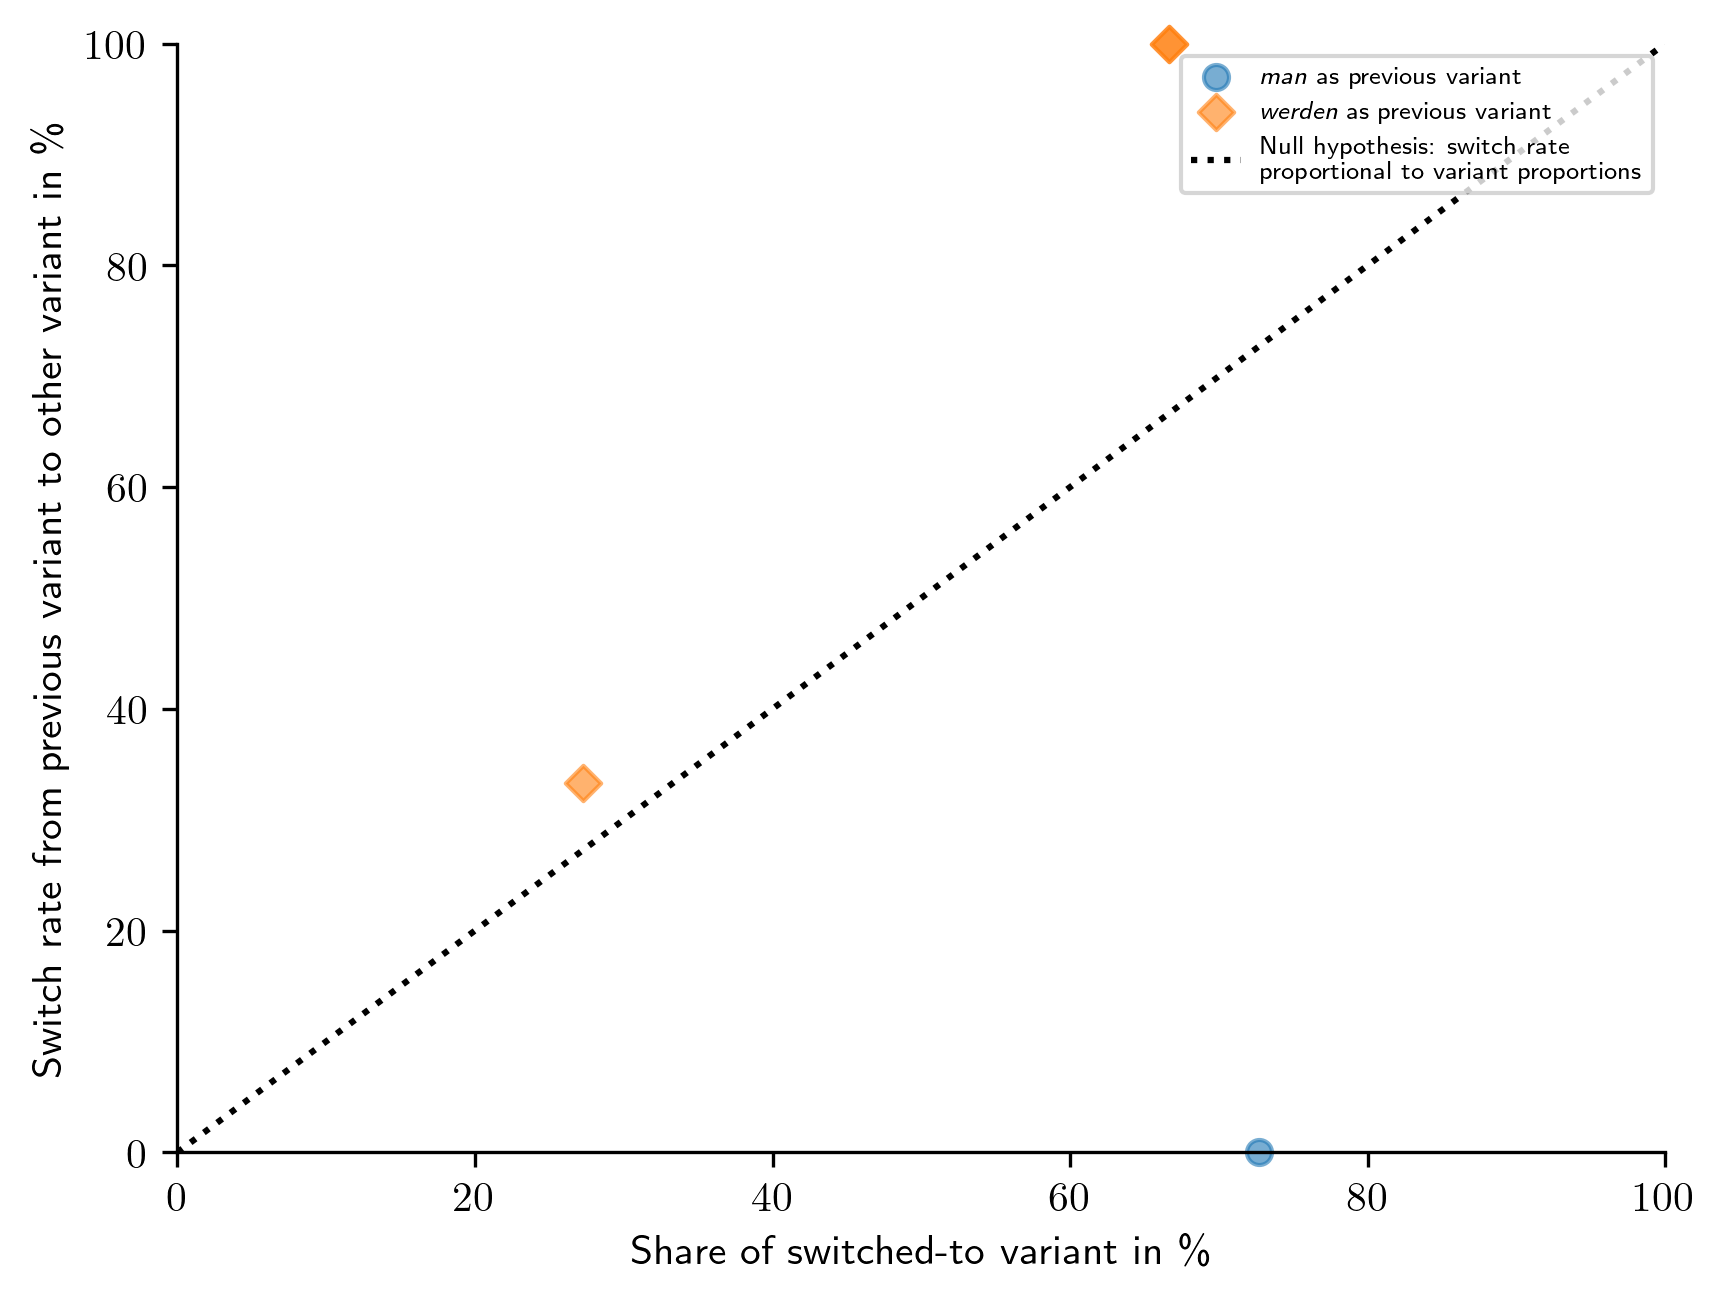

In [11]:
reload(quantification)

#considering switch/persistence from the very last use of any variant, irrespective of who uttered it, to the current variant
quantification.plot_switch_rate_over_variant_proportions(df, variation_sample, alternation_set, alternating)